In [2]:
import sys
from random import randint
import numpy as np
class Environment:
    """
    This class can be used to generate muliple test cases and multiple senarios of the path planning problem    
    """
    def __init__(self):
        self.rows= 14 #default value
        self.columns = 20
        self.env = None
        self.goal_flag = True
        self.goal_pos = (2,17) #default goal
        self.directions = [
            (-1, 0), (1, 0), (0, -1), (0, 1),  # Cardinal directions
            (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
        ] #For moving 
    def create_defualt_environment(self):
        """
        Initialize the environment with dimensions (rows x cols) and randomly place obstacles.
        """
        map_matrix = [
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        ]

        # Initialize the default map environment
        self.env = map_matrix

    def create_environment(self, rows, cols, obs):
        """
        Initialize the environment with dimensions (rows x cols) and randomly place obstacles.
            Args:
                rows (int): number of rows in zero index
                cols (int): number of cols in zero index
                obss (int): number of obstcales that willl be added in the enviroment


        """
        if obs > rows * cols:
            raise ValueError("Number of obstacles cannot exceed the total number of cells.")
        if rows <= 0 or cols <= 0:
            raise ValueError("Environment dimensions must be positive.")

        # Initialize empty environment
        self.env = [[0 for _ in range(cols)] for _ in range(rows)]
        self.add_boundaries() #fill the boundries with 1
        if obs>0:
            self.add_obstacles(obs) #add the obstcales if needeed 
        
    def find_goal_pos(self):
        for i, row in enumerate(self.env):
            for j, cell in enumerate(row):
                if cell == 2:
                    self.goal_pos = (i, j)
                # Return the position as a tuple (row, column)
                
    def add_boundaries(self):
        """
        Add boundaries (1s) around the environment edges.
        """
        for col in range(len(self.env[0])):
            self.env[0][col] = self.env[-1][col] = 1  # Top and bottom boundaries
        for row in range(len(self.env)):
            self.env[row][0] = self.env[row][-1] = 1  # Left and right boundaries

    def add_obstacles(self, obs):
        """
        Randomly place obstacles (1s) in the environment.
        Args:
            obs (int): number of obstecls to be added in the current enviroment randomly
        """
        while obs > 0:
            x, y = randint(1, len(self.env) - 2), randint(1, len(self.env[0]) - 2) #choosing random position
            if self.env[x][y] == 0: #checking that the position is valid to add obstcle
                self.env[x][y] = 1
                obs -= 1

    def place_goal(self, pos):
        """
        Place a goal (2) in the environment. If a goal already exists, replace it.
            Args: 
            pos (tuple): tuple of two values x and y in the zero index form
        """
        if self.goal_flag: #
            self.env[self.goal_pos[0]][self.goal_pos[1]] = 0  # Remove existing goal
        self.goal_pos = pos
        self.env[pos[0]][pos[1]] = 2
        self.goal_flag = True

    def start_wave(self):
        """
        Execute the wavefront algorithm to propagate values from the goal point.
        """
        if not self.goal_flag:
            #check for the occurance of a goal
            raise ValueError("Goal not set.")

        wave_value = 2
        self.env[self.goal_pos[0]][self.goal_pos[1]] = wave_value #setting the goal position to the value of 2 (Not neccessary but for the convention)
        queue = [self.goal_pos] #start the queue of the cells that need to be visited

        while queue:
            #looping over all the cells until no cell in the Qqueue
            next_queue = [] #the current surrounding cells that need to be visited and not visited before
            for x, y in queue:
                #for each cell in the current queue check the values of the surrounding cells and increment them
                for dx, dy in self.directions:
                    new_x, new_y = x + dx, y + dy
                    if 0 <= new_x < len(self.env) and 0 <= new_y < len(self.env[0]) and self.env[new_x][new_y] == 0:
                        self.env[new_x][new_y] = wave_value + 1
                        next_queue.append((new_x, new_y)) #add new cell to the next iteration
            wave_value += 1 #increment the wave value of the next iteration (further from our goal)
            queue = next_queue

    def get_shortest_path(self, start):
        """
        Compute the shortest path from the start position to the goal.
        Args:
            start (tuple): tuple of two values x and y in the zero index form

        """

        path = [start] #initialization of the path starting from the known point
        current = start

        while current != self.goal_pos: #looping till reaching the goal
            
            x, y = current
            min_value = float('inf') #Initializtion of the minmum surounding cell value
            next_step = None

            for dx, dy in self.directions:
                #checking the value of the surrounding cells in the 8 directions
                new_x, new_y = x + dx, y + dy
                if 0 <= new_x < len(self.env) and 0 <= new_y < len(self.env[0]) and self.env[new_x][new_y] > 1:
                    if self.env[new_x][new_y] < min_value:
                        #if we found new minimum
                        min_value = self.env[new_x][new_y]
                        next_step = (new_x, new_y)

            if not next_step:
                raise ValueError("No valid path found.")
            path.append(next_step) #add the minimum surrounding cell value to the the path
            current = next_step #moving to the next cell

        return path

    def set_enviroment(self, environment):
        """_summary_

        Args:
            environment (2darray): 2d array that has a goal value setteld and follow the enviroment sturcture
        """
        if isinstance(environment, np.ndarray):
            #if the sent array in nparray
            self.env = environment.tolist()
        else:
            self.env = environment
        self.find_goal_pos() #find the pos of the goal and save it
        
    def print_environment(self):
        """
        Print the current state of the environment.
        """
        for row in self.env:
            print(" ".join(f"{cell:2}" for cell in row))
    def print_path(self, path):
        """
        Print the points of the shortest path to the goal from the current position
        Args:
            path (1darray): 1d array of tuples for the position of each point
        """
        for i, (a, b) in enumerate(path):
            #print the path and increment the position +1 to overcome zero indexing and start from 1
            print(f"{a+1} {b+1}")



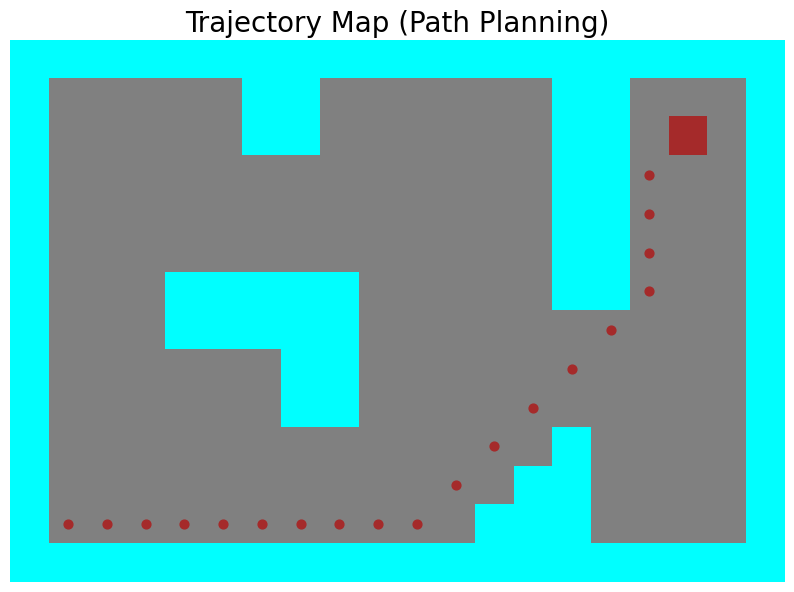

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
map_matrix = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

# Example grid representation (path planning)
# Using our module/class
env = Environment()
env.create_defualt_environment()
env.start_wave()
grid = np.array(map_matrix)
shortest_path = env.get_shortest_path((12,1))
# Define custom colors (0: free space, 1: obstacle, 2: start, 3: goal, 4: path)
cmap = ListedColormap(['gray', 'blue', 'cyan', 'lime', 'brown'])

plt.figure(figsize=(10, 8))
plt.imshow(grid, cmap=cmap, interpolation='nearest')

plt.title("Trajectory Map (Path Planning)", fontsize=20)

for point in shortest_path:
    plt.scatter(point[1], point[0], color='brown', s=40)
plt.axis('off') 

plt.show()


In [7]:
"""
Testing from the mat file and generation of the map and path
"""
    
from scipy.io import loadmat
# Load the map
data = loadmat("maze.mat")
map_data = data['map']

#Initializing an enviroment with the map
path_planner = Environment()
path_planner.set_enviroment(map_data)
path_planner.start_wave()  # Run the wavefront algorithm

path_planner.print_environment()


 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  

In [8]:
path_planner.goal_pos

(4, 149)

In [13]:
def planner(map , start_row, start_column):
    new_enviroment = Environment()
    new_enviroment.set_enviroment(map)
    new_enviroment.start_wave()
    shortest_path = new_enviroment.get_shortest_path((start_row-1, start_column-1))
    new_enviroment.print_path(shortest_path)
    value_map = new_enviroment.env
    return [value_map, shortest_path]


In [14]:
data = loadmat("maze.mat")
map_data = data['map']

vaulemap, shortest_path = planner(map_data, 45,4)

45 4
44 4
43 4
42 4
41 4
40 4
39 4
38 4
37 4
36 4
35 4
34 4
33 4
32 4
31 4
30 4
29 4
28 4
27 4
26 4
25 4
24 4
23 4
22 4
21 4
20 4
19 4
18 4
17 4
16 4
15 4
14 4
13 4
12 5
11 6
10 7
9 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
9 59
10 59
11 58
11 57
11 56
11 55
11 54
11 53
11 52
11 51
11 50
11 49
11 48
11 47
11 46
12 45
13 44
14 43
15 42
16 41
17 40
18 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
20 54
21 55
22 56
23 57
24 58
25 59
26 59
27 58
27 57
27 56
27 55
27 54
27 53
27 52
27 51
27 50
27 49
27 48
27 47
27 46
27 45
27 44
27 43
27 42
27 41
27 40
27 39
27 38
28 37
29 36
30 35
31 34
32 33
33 32
34 32
35 32
36 32
37 32
38 32
39 32
40 32
41 32
42 32
43 32
44 32
45 32
46 31
47 30
48 29
49 28
50 27
51 26
51 25
51 24
51 23
51 22
51 21
51 20
51 19
51 1

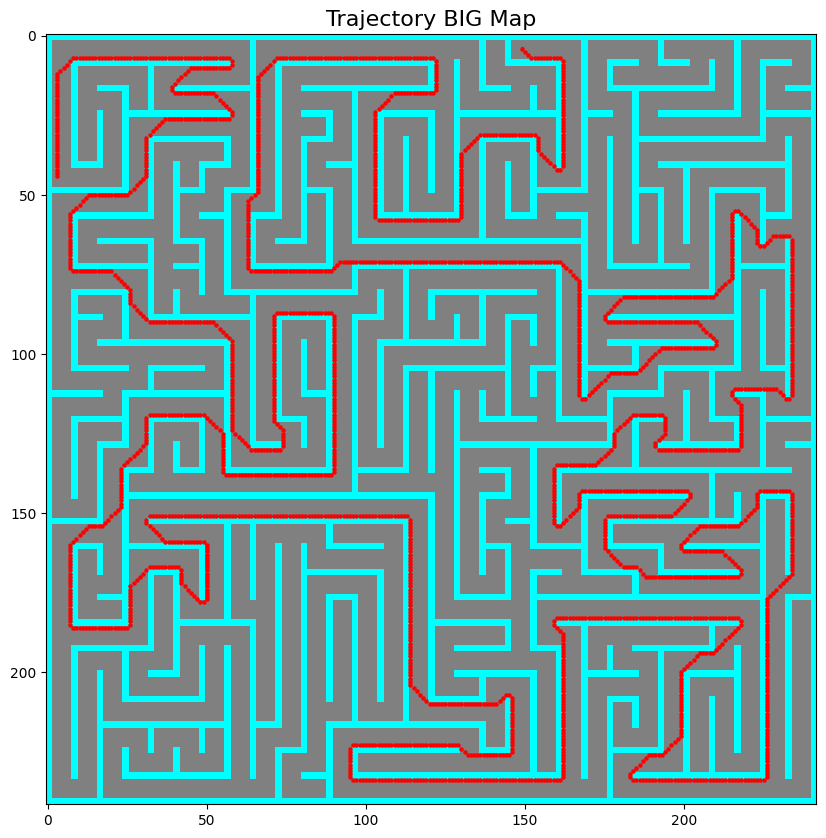

In [15]:

visual_data = loadmat("maze.mat") #reading the map again for visulaization
# Plot the trajectory map
plt.figure(figsize=(20, 10))
plt.imshow(visual_data['map'], cmap=cmap, interpolation='nearest')
plt.title("Trajectory BIG Map", fontsize=16)

for point in shortest_path:
    plt.scatter(point[1], point[0], color='red', s=5)
plt.show()

